In [1]:
#importaciones
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mpldates

In [2]:
#lectura de datos
events = pd.read_csv('events.csv.gzip', compression='gzip', 
                     dtype={
                         'device_countrycode': 'category', 
                         'device_city': 'category',
                         'ref_type': 'category',
                         'application_id': 'category',
                         'device_os_version': 'category',
                         'device_brand': 'category',
                         'device_model': 'category',
                         'session_user_agent': 'category',
                         'trans_id': 'category',
                         'user_agent': 'category',
                         'carrier': 'category',
                         'kind': 'category',
                         'device_os': 'category',
                         'device_os_version': 'category',
                         'device_language': 'category',
                         'connection_type': 'category',
                         'wifi': 'category'
                     })

In [3]:
events.dtypes

date                    object
event_id                 int64
ref_type              category
ref_hash                 int64
application_id        category
attributed                bool
device_countrycode    category
device_os_version     category
device_brand          category
device_model          category
device_city           category
session_user_agent    category
trans_id              category
user_agent            category
event_uuid              object
carrier               category
kind                  category
device_os             category
wifi                  category
connection_type       category
ip_address               int64
device_language       category
dtype: object

In [4]:
events.wifi.dtype

CategoricalDtype(categories=['false', 'true'], ordered=False)

In [5]:
# Empecemos por explorar events

events.describe()

,event_id,ref_hash,ip_address
count,2.494423e+06,2.494423e+06,2.494423e+06
mean,9.970445e+01,4.641486e+18,4.620786e+18
std,1.070903e+02,2.660724e+18,2.672746e+18
min,0.000000e+00,1.633675e+14,5.287755e+12
25%,2.200000e+01,2.326142e+18,2.333410e+18
50%,3.100000e+01,4.688964e+18,4.541498e+18
75%,1.610000e+02,6.927594e+18,7.044307e+18
max,7.120000e+02,9.223316e+18,9.223367e+18


In [6]:
events.sample(10)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
229636,2019-03-12 21:11:56.949,1,1891515180541284343,4964318066741579990,64,False,6333597102633388268,5.908703034097298e+17,NaN,7.009464952779986e+18,...,NaN,NaN,1fa30479-8ce0-4165-9336-c90020c555cc,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7788067777258740360,3.3013777759776993e+18
1695151,2019-03-13 16:18:36.133,22,1891515180541284343,4658838391850648405,16,False,6333597102633388268,NaN,2.208834667126999e+18,3.0375155629570515e+17,...,NaN,6.996914885247048e+18,cc3890d4-c779-474d-ac44-f8f76cd98a98,NaN,5.500848327478996e+18,NaN,true,NaN,2403839579048525602,9.0283826551012e+18
2127156,2019-03-10 21:13:38.241,102,1891515180541284343,228946036681184484,136,False,6333597102633388268,NaN,3.083058605577787e+17,4.4452523127597215e+18,...,NaN,7.738334399785623e+18,7d91b743-2acc-4b79-bd73-6e53c33c1642,NaN,8.963742034198264e+18,NaN,true,NaN,4982545525278883067,9.0283826551012e+18
1699853,2019-03-12 21:34:41.486,22,1891515180541284343,4667564762790917345,16,False,6333597102633388268,NaN,2.208834667126999e+18,3.0574023248014715e+18,...,NaN,1.5421924836478075e+18,3205a0b4-4bf5-4422-8892-1500b0a81ea2,NaN,5.500848327478996e+18,NaN,true,NaN,2522573681688569280,9.0283826551012e+18
1064747,2019-03-06 04:35:47.242,133,1891515180541284343,6483235183034130821,102,False,6333597102633388268,NaN,4.294682762112152e+18,7.082859781834681e+18,...,NaN,6.87176894393174e+18,01d7b817-ccd9-4828-90ee-a4027f6dd5e7,NaN,8.569825701272477e+18,NaN,true,NaN,3836885207084503381,6.977049253562486e+18
2232671,2019-03-05 05:05:09.065,31,1891515180541284343,2378304478812371964,145,False,6333597102633388268,4.584084460548654e+18,NaN,3.686066659168077e+17,...,NaN,NaN,0a94ab95-c58c-4ab0-a287-e05fde8bdcd9,NaN,5.104972432847709e+18,NaN,NaN,NaN,2390610502365065286,6.804427935983149e+18
740770,2019-03-10 13:58:28.342,1,1494519392962156891,5791399765706868398,103,False,6333597102633388268,4.3537503246500966e+18,NaN,1.764701447250044e+18,...,NaN,NaN,867a2a78-649f-469d-b230-76ca12cd8cd9,2.2481569642543155e+17,9.977660181316936e+17,6.941824626260379e+18,NaN,Cable/DSL,4390198205273420040,3.3013777759776993e+18
2486021,2019-03-13 22:31:09.580,161,1891515180541284343,4949777087992623572,64,False,6333597102633388268,7.391843585977942e+18,NaN,4.889838075611014e+18,...,NaN,NaN,0fb58d3f-0185-46a0-97bf-3a595e275f40,2.2481569642543155e+17,9.066787919123543e+18,7.531669329342818e+18,NaN,Cellular,5091540980393240159,3.3013777759776993e+18
1793314,2019-03-05 22:15:04.284,22,1891515180541284343,2247033197205999985,10,False,6333597102633388268,NaN,3.083058605577787e+17,7.11634310093634e+18,...,NaN,6.10522694935703e+18,36c2d736-32a0-4f87-b492-727ece49e23a,NaN,5.500848327478996e+18,NaN,true,NaN,8013630882118351036,9.0283826551012e+18
988620,2019-03-13 17:10:35.274,31,1494519392962156891,6841599612269691157,212,False,6333597102633388268,4.3537503246500966e+18,NaN,2.9282623200704937e+18,...,NaN,NaN,6d85a99e-47b5-442c-8532-9538548038df,NaN,5.104972432847709e+18,NaN,NaN,NaN,1142285506564170273,6.804427935983149e+18


In [7]:
# ¿Cuántos registros tiene?
events.size

54877306

In [8]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
ref_hash              2494423
application_id        2494423
attributed            2494423
device_countrycode    2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
trans_id                   82
user_agent            1391527
event_uuid            2489324
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [9]:
events['wifi'].value_counts()

true     930902
false    447970
Name: wifi, dtype: int64

In [10]:
# elimino las filas que tengan todos sus valores en NaN
events.dropna(how='all')
events.shape

(2494423, 22)

In [11]:
events.size

54877306

In [12]:
# cuántos device_countrycode hay?
events['device_countrycode'].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

Hay un solo countrycode

# Cuántas ciudades distintas hay?

In [13]:
# cuántos device_city hay?
events['device_city'].value_counts()

3.8000799488967747e+18    561876
2.551781375196177e+18      11193
3.2582150459884605e+18      4442
8.223209269143922e+18       4393
8.578626579239988e+17       2497
8.985217056239735e+18       2203
7.602876036620469e+18       1945
6.276065650874414e+17       1924
2.0489923564619796e+18      1851
5.801433683024338e+18       1848
6.102141091106202e+18       1591
1.16468287562278e+18        1123
4.4246229588650675e+18      1061
4.1122184524297533e+18       958
1.1895429525854325e+17       912
4.847858242945663e+17        756
8.235236537216161e+18        744
6.959330348495504e+18        713
2.715324676035127e+18        631
1.2816911001604083e+18       599
5.847627926933047e+18        591
8.318795483645021e+18        574
6.434016956850084e+17        514
1.3535971026191767e+18       505
7.425634410263832e+18        486
7.60148454103576e+18         472
5.261773315746305e+18        425
1.0840811693621105e+18       413
8.127301688691997e+17        380
2.3023179601912517e+18       285
          

Hay 127 ciudades distintas. Evidentemente, los datos que nos han cedido corresponden a un solo país.

In [14]:
# los cambio a tipo category
events['device_countrycode'] = events['device_countrycode'].astype('category')
events['device_city'] = events['device_city'].astype('category')

In [15]:
events['ref_type'].value_counts()


1891515180541284343    1882743
1494519392962156891     611680
Name: ref_type, dtype: int64

In [16]:
#lo paso a category
events['ref_type'] = events['ref_type'].astype('category')

In [17]:
del events['ref_hash']

In [18]:
events['application_id'].value_counts()

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
120     68421
149     60326
10      58311
170     55820
7       48005
8       38972
102     32579
248     31070
54      29284
166     27611
16      24365
125     23018
140     22215
136     15362
119     15282
45      14321
214     10112
134     10003
112      9871
43       9336
        ...  
91          3
62          3
33          3
232         3
228         2
135         2
36          2
209         2
206         2
49          2
81          2
117         2
188         2
11          2
290         2
165         1
158         1
25          1
305         1
295         1
154         1
286         1
86          1
132         1
146         1
240         1
245         1
255         1
155         1
322         1
Name: application_id, Length: 269, dtype: int64

In [19]:
events['application_id'] = events['application_id'].astype('uint16')

In [20]:
events['device_os_version'].value_counts()

4.3537503246500966e+18    277691
7.391843585977942e+18     104170
8.824598512074042e+18      77947
1.6273135773546924e+18     58099
4.823236647981168e+18      47501
2.85370396744477e+18       46823
2.635068060671423e+18      41978
5.908703034097298e+17      38321
8.530335778938208e+17      33964
8.218259696094497e+18      31563
4.584084460548654e+18      30944
7.008467012956373e+18      27302
5.940957351303096e+18      24224
4.466870626275729e+18      21876
8.840145871557405e+18      20197
5.577468495817814e+18      19307
8.913929730553542e+18      15515
3.56844623815159e+18       14698
8.806974323879854e+18      14174
5.432641194361306e+18       9740
4.967033121496544e+18       6970
4.953783083284584e+18       6270
6.10686129079723e+18        4304
5.668904594719908e+18       4191
2.628777490844412e+18       3824
5.568789074483471e+18       3669
5.034511441443622e+18       2803
4.646970999381444e+18       2771
6.965265633862224e+18       2260
5.438928456834394e+18       2260
          

In [21]:
events['device_os_version'] = events['device_os_version'].astype('category')

In [22]:
events['device_brand'].value_counts()

3.083058605577787e+17     579861
3.812620986737351e+18     115538
2.208834667126999e+18     113636
2.987569314309514e+18     107472
2.5232459822329236e+18     94672
5.1379920467642125e+17     39432
3.2285160909036396e+18     15589
2.262848417324907e+18      12325
6.538561794435555e+18      11839
1.083368711068078e+18       9667
4.371307750970993e+18       8604
3.742387098176767e+18       6825
1.9103272551269105e+18      5919
8.230045013295288e+17       5256
7.512612244959867e+18       3052
5.937501462472654e+18       2867
6.111646853627296e+18       2862
8.255276631056499e+18       2416
5.588755459133625e+18       2101
3.093165991971729e+18       2076
2.370132235094487e+18       2004
6.751007869822716e+18       1902
5.645691558423168e+18       1899
4.043700875052048e+18       1441
5.951324980112395e+18       1228
3.8494904260895846e+18      1114
4.1137519177429806e+18       995
7.855185525087771e+18        912
1.8829174247592527e+18       670
7.465674792046323e+18        516
          

In [23]:
events['device_brand'] = events['device_brand'].astype('category')

In [24]:
events['device_model'].value_counts()

2.33194661091417e+18      210697
7.787530752469096e+18      74780
9.14903648623246e+18       66279
2.0664313823771248e+17     60168
4.4452523127597215e+18     56241
1.7545278564638182e+18     53850
8.163782690166159e+18      48814
7.11634310093634e+18       44598
2.9282623200704937e+18     41494
5.990116681709081e+18      40935
1.26767685640937e+18       38870
1.1876609915140178e+17     38629
3.624089450035605e+18      37489
4.281729328614173e+18      36006
6.598698943038051e+18      30656
1.1813182677101786e+18     26846
6.026543327929208e+18      26460
3.686066659168077e+17      26275
1.5409071305566963e+18     25154
2.4354500947795727e+18     24645
4.5454901435473823e+18     24201
4.689550129432457e+18      22497
8.604122202547542e+18      22268
1.764701447250044e+18      21661
4.4305786865637033e+18     20316
2.1369349693676014e+18     19213
6.88241452041436e+18       19122
8.535198356827955e+18      18648
8.733768846357008e+18      17953
4.349815524632825e+18      17790
          

In [25]:
events['device_model'] = events['device_model'].astype('category')

In [26]:
events['session_user_agent'].value_counts()

3.819516403548394e+18     1461049
7.164321382499455e+18      649962
1.1609515031332844e+18      78232
2.394269162455642e+18       11210
3.8316191210585426e+18      10838
6.59386819643465e+18         9911
2.4958048761062277e+18       7391
7.512089018183668e+18        6995
7.738334399785623e+18        6770
7.72027024220892e+18         6626
5.254247406123229e+18        6450
4.3922650149309645e+18       5998
9.177081431590678e+18        5615
1.2440622242452342e+18       5525
3.5907478428344975e+18       5448
6.840860440298272e+18        5055
1.637986409760501e+18        4872
5.407281900521064e+18        4619
5.51960942967474e+18         3914
4.525726530677256e+18        3724
4.47207748927856e+18         3657
4.185911564152913e+18        3436
6.10522694935703e+18         3412
8.089178157941562e+18        3326
2.9554935318608517e+18       3267
4.2591543230719636e+18       3194
4.455209013830674e+18        3008
6.36894744937942e+18         3004
6.091499354492879e+18        2755
8.227344568093

In [27]:
events['session_user_agent'] = events['session_user_agent'].astype('category')

In [28]:
events['trans_id'].value_counts()

{hash}                                                                                                           33
0                                                                                                                16
103430dcab4b60eb4f                                                                                                9
433f38e2c758468ab632dcab7281d4be_Y2NhPTEwLzI1LzIwMTggMTA6Mjk6MjUgUE0mb2ZmZXJJZD0zMzQ1NjQ0NiZhZmZJZD0yMjMyNzUx     7
210a4c5786d249c78bb30237abcac890_Y2NhPTQvMjEvMjAxOCA1OjI2OjM3IFBNJm9mZmVySWQ9MzM0NTY0NDYmYWZmSWQ9MTY2MTgxNQ==     6
77ca31a9-b0e0-4884-8de8-c2ee74f1cc32                                                                              2
0941bb7b-866f-4d5a-9b85-63e77b27d562                                                                              2
1901171053a509cd7317f2c6                                                                                          2
57d62969                                                                

In [29]:
del events['trans_id']

In [30]:
events['user_agent'].value_counts()

2.394269162455642e+18     42325
7.72027024220892e+18      37523
6.59386819643465e+18      36173
5.930547337170416e+18     35950
5.254247406123229e+18     32902
6.10522694935703e+18      31554
3.43749743931221e+18      28317
7.738334399785623e+18     27218
4.3922650149309645e+18    23386
2.948343093474511e+18     19773
6.741680180239527e+18     19404
5.323194805072353e+18     18277
8.234145808386622e+18     17985
4.185911564152913e+18     17157
1.2440622242452342e+18    16243
6.840860440298272e+18     15798
1.637986409760501e+18     15196
2.4958048761062277e+18    15085
9.177081431590678e+18     14872
2.9554935318608517e+18    13923
5.144382081229548e+18     13033
5.407281900521064e+18     11255
3.5907478428344975e+18    10571
8.089178157941562e+18     10551
8.22734456809323e+18      10066
6.322452758521056e+18      9284
8.301989661429948e+17      9100
4.47207748927856e+18       8390
2.6795308969710915e+18     8253
5.0990105183075226e+17     8160
                          ...  
5.293566

In [31]:
events['user_agent'] = events['user_agent'].astype('category')

In [32]:
events['event_uuid'].value_counts()

a56e61c4-14b6-4ffe-a983-f0eb5fc2d747    1
c9331686-684c-4ef0-a554-16b0a7dcacb0    1
513d6238-b276-4899-86fa-d84dce565f26    1
ee325baf-97c0-4098-9fc1-546d1c599b24    1
ea3a8539-8550-45c9-bf00-0a89af8829ac    1
8e265073-9ad8-4551-9c12-e4b65410a2c6    1
0c315f54-1457-4839-bf5a-56b75f5c6f7e    1
4527ede0-38cc-4c0c-9559-be399f76f74d    1
44a66a53-77fe-4cf9-a672-b296cac53667    1
33437951-6348-4f75-8ccc-ffde2eb66643    1
c6fb58dc-684a-44b0-bcb9-c205f305155e    1
116793ee-a4e1-4601-90bb-6127039f0696    1
41309907-265e-4bb7-a4f4-de20b41e613c    1
a55df979-616b-4cf7-b119-2a577ec62807    1
0d9fdd3c-59cf-4493-8277-209683e64aec    1
0a747684-892e-4511-b917-2af3ceb382a6    1
6e2ea9be-7313-4b5c-8bea-e73c11670efe    1
57bec9a3-b57a-45f0-ba97-52359d748dde    1
2eee23f6-56e4-4b93-8fc3-d224faab6c9b    1
e3668493-71fc-47ea-9861-6fc29a913a0b    1
311f4d64-4cc0-4565-9d42-67b1d7a9d18f    1
eb66d9e3-049c-48fc-a4c2-ded562f9178a    1
0a183d69-17d8-4ba6-82dd-d8fb34b01b57    1
a0e866e6-1277-4cca-b6e1-8ca977978a

In [33]:
# son más de 2 millones, esto no es una categoría, además no aporta información relevante
del events['event_uuid']
events['carrier'].value_counts()

2.2481569642543155e+17    436983
1.1795872560140132e+18     80958
7.855224497172788e+18      58478
6.948827726700092e+18      29574
3.570805180856832e+18       3457
4.890488855514004e+18       2527
7.232922439046282e+18       1491
7.216101851670709e+18        539
1.7576903483791066e+18       464
3.1349838132534666e+18       336
2.58683288719403e+18         311
8.005033990448529e+18        227
2.276828313171018e+17        185
3.751135050063284e+18        145
5.851845794617676e+18        121
1.4010825245156086e+18        73
3.550680419448072e+18         66
5.255184358353569e+18         58
5.926614067260969e+18         36
6.046846537041924e+18         33
2.1988510698396652e+18        29
1.8329019614137016e+18        17
4.699500034143047e+18         17
7.87498164012504e+18          15
4.958858478611984e+17         15
1.312636194459128e+18         15
5.0624501543466e+17           14
2.580400656600893e+18         14
8.628827427227626e+18         14
5.268425616448026e+18         14
          

In [34]:
events['carrier'] = events['carrier'].astype('category')

In [35]:
events['kind'].value_counts()

5.500848327478996e+18     618217
5.104972432847709e+18     300632
9.066787919123543e+18     217846
9.977660181316936e+17     151445
8.820572319511919e+18     110045
4.647948847353587e+18     100029
3.2090781690992343e+18     84898
2.3767496212528297e+18     56489
7.320635661394365e+18      52726
4.0176741840411725e+18     43936
5.5715199625661126e+17     42101
4.074559116314067e+18      39892
5.913921070048764e+18      38067
4.821815004439628e+18      37056
5.059134271513848e+18      35588
8.370513340818052e+18      26228
4.853173252142275e+18      24296
6.51420806757284e+18       23444
6.168308581888314e+18      22788
6.794944093927819e+18      18599
1.2869764740456515e+18     14408
7.499875431243801e+18      13940
5.735892088608821e+18      13455
5.882882097123621e+18      12953
7.310429127362015e+17      11853
2.481896960094684e+18      11711
7.00532667621659e+18       11678
6.417927117224306e+18      10939
8.569825701272477e+18      10860
9.01838557291685e+18       10213
          

In [36]:
events['kind'] = events['kind'].astype('category')

In [37]:
events['device_os'].value_counts()

7.531669329342818e+18     389811
6.941824626260379e+18     260861
2.7488313570525307e+18      6110
5.916186881232351e+18        885
Name: device_os, dtype: int64

In [38]:
events['device_os'] = events['device_os'].astype('category')

In [39]:
events['wifi'].value_counts()

true     930902
false    447970
Name: wifi, dtype: int64

In [40]:
events['connection_type'].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

In [41]:
events['connection_type'].dtype

CategoricalDtype(categories=['Cable/DSL', 'Cellular', 'Corporate'], ordered=False)

In [42]:
events['connection_type'].memory_usage(deep=True)

2494780

In [43]:
events['connection_type'] = events['connection_type'].astype('category')

In [44]:
events['connection_type'].dtype

CategoricalDtype(categories=['Cable/DSL', 'Cellular', 'Corporate'], ordered=False)

In [45]:
events['connection_type'].memory_usage(deep=True)

2494780

In [46]:
events['ip_address'].value_counts()

1992632945768888579    22640
3162368506662488065    19379
7726314782926052608    17704
2394721645995561079     9777
589886713227299026      7561
7833422721300884983     7197
3564864895681659759     7142
4537476465028897433     7140
2403839579048525602     7100
7410847412569818934     7065
8235954648733428120     6933
7481987231813232849     6855
1093212093074216349     6347
8010533080341024188     6241
2441645233986204328     6108
2706357072127963511     4993
8262991154202232888     4736
1037699812701179191     4554
2988221197536288219     4408
2322330997698851930     3901
6286868732416664667     3698
8928734162578817363     3519
8531002764348621869     2710
7326588564616977029     2595
6452955265823183819     2571
7571354015197421297     2556
7858558567428669000     2520
3222899837426106171     2518
3692763185030977380     2450
6324037615828123965     2408
                       ...  
8354349022722988350        1
7810143944060388432        1
21847751496269070          1
76769657022625

In [47]:
events['device_language'].value_counts()

6.977049253562486e+18     745898
3.3013777759776993e+18    589865
9.0283826551012e+18       388832
6.804427935983149e+18     340624
4.621024053086952e+18     150143
4.077062198952597e+17      53277
2.822843369618519e+17      28294
4.060929664968129e+18      25943
3.095855928498728e+18      25635
6.111820034171223e+18      18314
1.5264214271539814e+18     10181
1.1932786179815933e+18      6968
6.035179960508536e+18       3681
3.1772649501524695e+18      3077
3.695787044360519e+17       2622
6.535228344298127e+18       2201
2.554250790954083e+18       1465
1.1015391524827163e+17       845
5.649026280217904e+18        740
4.073834886007358e+18        553
5.061641824384339e+18        441
7.77431571166467e+18         399
3.7887455341954785e+18       395
3.915023192723985e+18        339
1.5158880551616256e+18       335
4.594650153337342e+18        305
2.4883657416061665e+18       305
5.84621722065469e+18         284
8.149693170391004e+18        233
7.687656459658518e+17        230
          

In [48]:
events['device_language'] = events['device_language'].astype('category')

In [49]:
counts = events['device_language'].value_counts()
indexes = counts[counts<7000].index
mask_dict = dict.fromkeys(indexes, 'other')
events['device_language'] = events['device_language'].replace(mask_dict)
events['device_language'].value_counts()

6.977049253562486e+18     745898
3.3013777759776993e+18    589865
9.0283826551012e+18       388832
6.804427935983149e+18     340624
4.621024053086952e+18     150143
4.077062198952597e+17      53277
other                      29598
2.822843369618519e+17      28294
4.060929664968129e+18      25943
3.095855928498728e+18      25635
6.111820034171223e+18      18314
1.5264214271539814e+18     10181
Name: device_language, dtype: int64

In [50]:
events.memory_usage(deep=True)

Index                        80
date                  199553840
event_id               19955384
ref_type                2494655
application_id          4988846
attributed              2494423
device_countrycode      2494579
device_os_version       2503308
device_brand            5018630
device_model            5275839
device_city             5003887
session_user_agent      5143927
user_agent              5552200
carrier                 2503547
kind                    5054874
device_os               2494896
wifi                    2494626
connection_type         2494700
ip_address             19955384
device_language       189874134
dtype: int64

In [63]:
# desecho el país porque es siempre el mismo. No me suma información
del events['device_countrycode']

KeyError: 'device_countrycode'

In [52]:
events.memory_usage(deep=True)

Index                        80
date                  199553840
event_id               19955384
ref_type                2494655
application_id          4988846
attributed              2494423
device_os_version       2503308
device_brand            5018630
device_model            5275839
device_city             5003887
session_user_agent      5143927
user_agent              5552200
carrier                 2503547
kind                    5054874
device_os               2494896
wifi                    2494626
connection_type         2494700
ip_address             19955384
device_language       189874134
dtype: int64

In [53]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
application_id        2494423
attributed            2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
user_agent            1391527
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [54]:
events['application_id'].value_counts()

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
120     68421
149     60326
10      58311
170     55820
7       48005
8       38972
102     32579
248     31070
54      29284
166     27611
16      24365
125     23018
140     22215
136     15362
119     15282
45      14321
214     10112
134     10003
112      9871
43       9336
        ...  
127         3
62          3
232         3
91          3
135         2
36          2
290         2
49          2
11          2
228         2
209         2
206         2
117         2
188         2
81          2
322         1
25          1
86          1
132         1
146         1
155         1
158         1
165         1
240         1
245         1
255         1
286         1
295         1
305         1
154         1
Name: application_id, Length: 269, dtype: int64

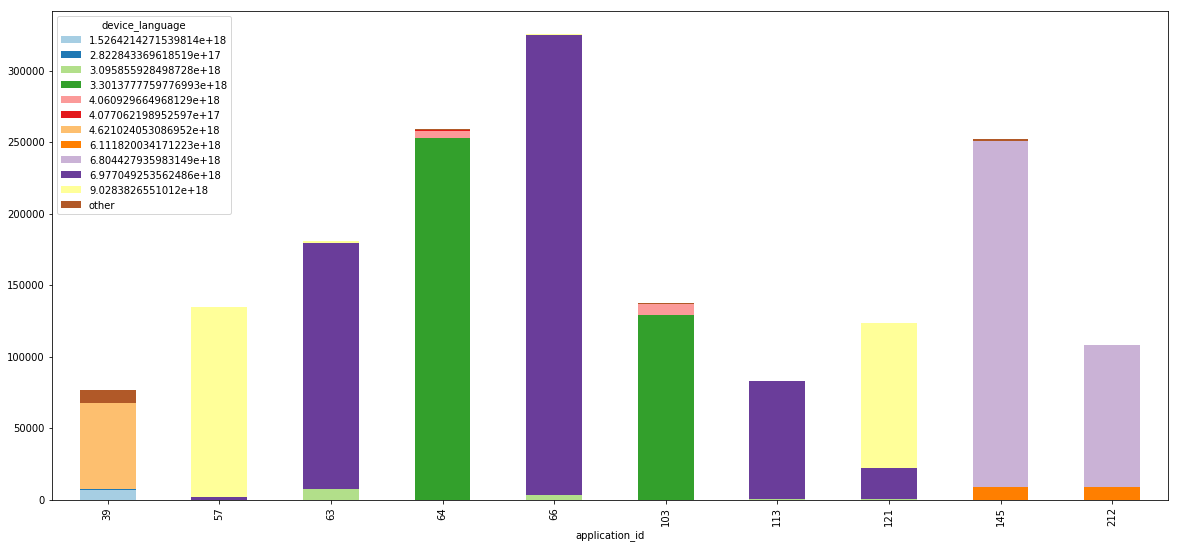

In [55]:
#Hay demasiadas aplicaciones, me quedo con las 10 que más eventos generan entonces
appcode = events['application_id'].value_counts().nlargest(10).index
top10apps = events[events['application_id'].isin(appcode)]
langs = top10apps[['application_id', 'device_language']].groupby('application_id').agg({'device_language' : 'value_counts'})
langs['device_language'].unstack().plot(kind = 'bar', stacked = True, figsize = (20,9), colormap = 'Paired')
plt.show()

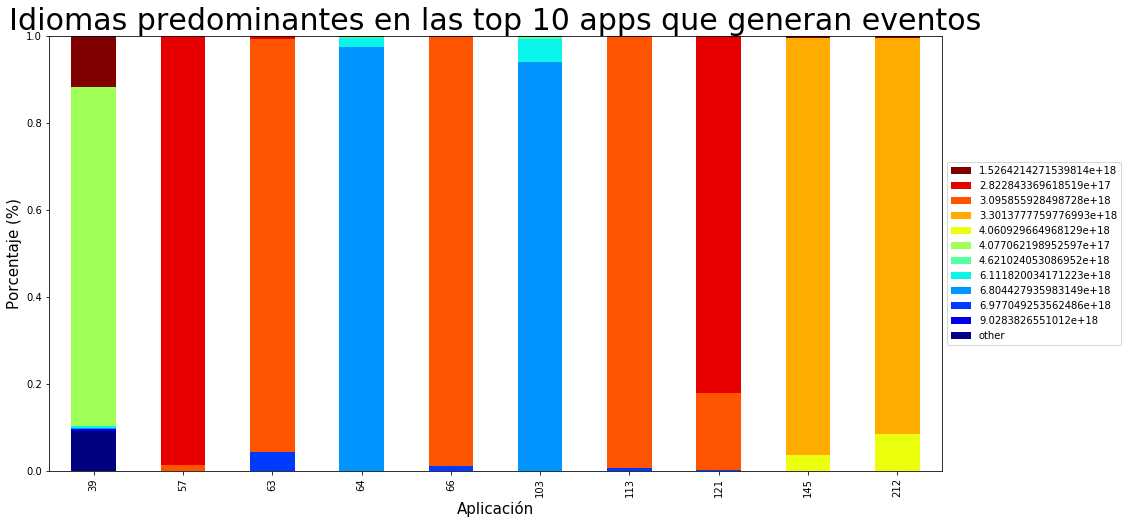

In [56]:
us = pd.DataFrame(top10apps.groupby(['application_id', 'device_language']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'device_language', index = 'application_id')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['other', '9.0283826551012e+18', '6.977049253562486e+18', '6.804427935983149e+18', '6.111820034171223e+18', '4.621024053086952e+18',
 '4.077062198952597e+17', '4.060929664968129e+18', '3.3013777759776993e+18', '3.095855928498728e+18', '2.822843369618519e+17', '1.5264214271539814e+18']
f = plt.figure()
plt.title('Idiomas predominantes en las top 10 apps que generan eventos',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Aplicación', size = 15);
ax.set_ylim(0,1)
plt.show()

In [57]:
events.head()

,date,event_id,ref_type,application_id,attributed,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,3.2582150459884605e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,3.2582150459884605e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,3.2582150459884605e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,2.551781375196177e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,38,False,7.391843585977942e+18,NaN,5.960895846746644e+18,6.959330348495504e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


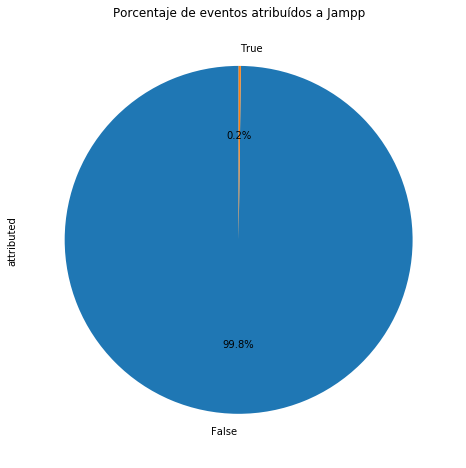

In [58]:
events['attributed'].value_counts().plot(kind = 'pie', figsize = (12,8), autopct = '%1.1f%%', startangle = 90, title = 'Porcentaje de eventos atribuídos a Jampp')
plt.show()

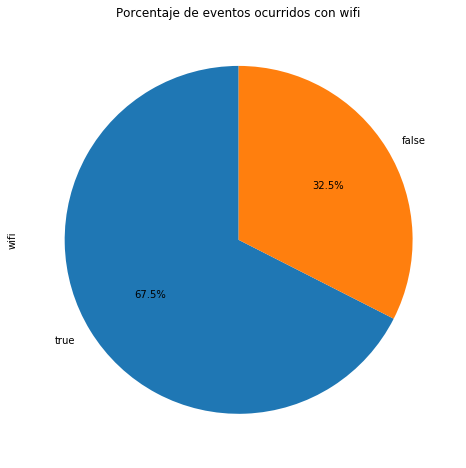

In [78]:
events['wifi'].value_counts().plot(kind = 'pie', figsize = (12,8), autopct = '%1.1f%%', startangle = 90, title = 'Porcentaje de eventos ocurridos con wifi')
plt.show()

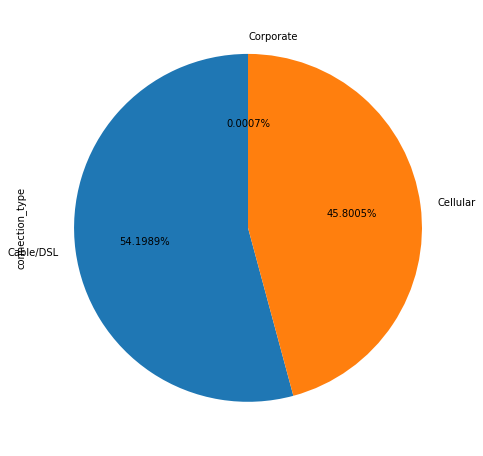

In [87]:
conexiones = events[events['connection_type'].notnull()]
conexiones['connection_type'].value_counts().plot(kind = 'pie', figsize = (12,8), autopct = '%1.4f%%', startangle = 90)
plt.show()

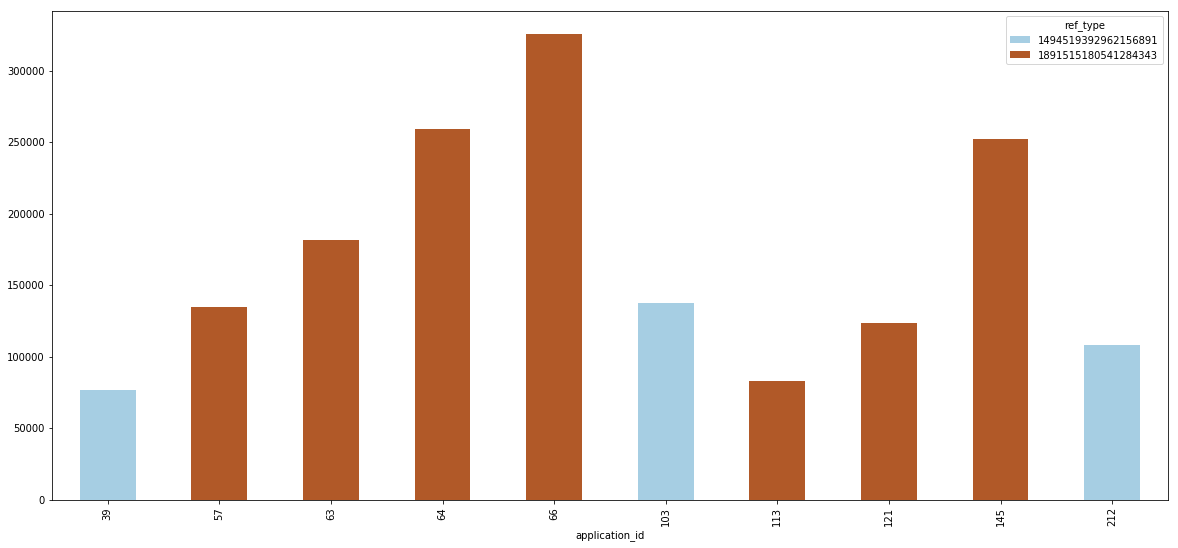

In [59]:
os = top10apps[['application_id', 'ref_type']].groupby('application_id').agg({'ref_type' : 'value_counts'})
os['ref_type'].unstack().plot(kind = 'bar', stacked = True, figsize = (20,9), colormap = 'Paired')
plt.show()

In [60]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
application_id        2494423
attributed            2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
user_agent            1391527
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [74]:
counts = top10apps['session_user_agent'].value_counts()
indexes = counts[counts<10000].index
mask_dict = dict.fromkeys(indexes, 'other')
top10apps.loc[:,'session_user_agent'] = top10apps['session_user_agent'].replace(mask_dict)
top10apps[top10apps['application_id'] == 66]['session_user_agent'].value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3.819516403548394e+18    325696
Name: session_user_agent, dtype: int64

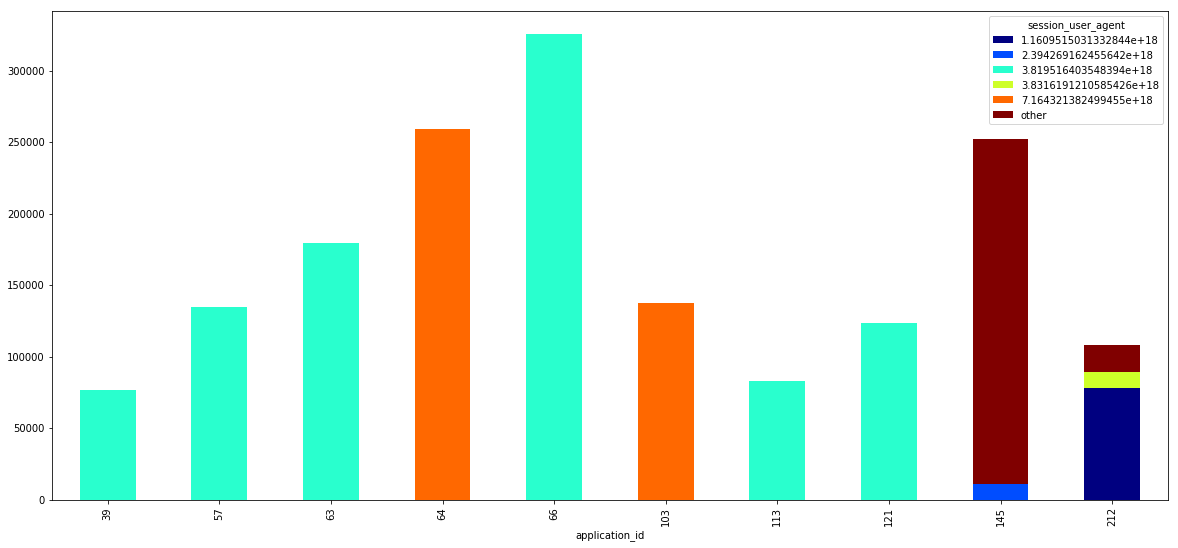

In [73]:
sua = top10apps[['application_id', 'session_user_agent']].groupby('application_id').agg({'session_user_agent' : 'value_counts'})
sua['session_user_agent'].unstack().plot(kind = 'bar', stacked = True, figsize = (20,9), colormap = 'jet')
plt.show()

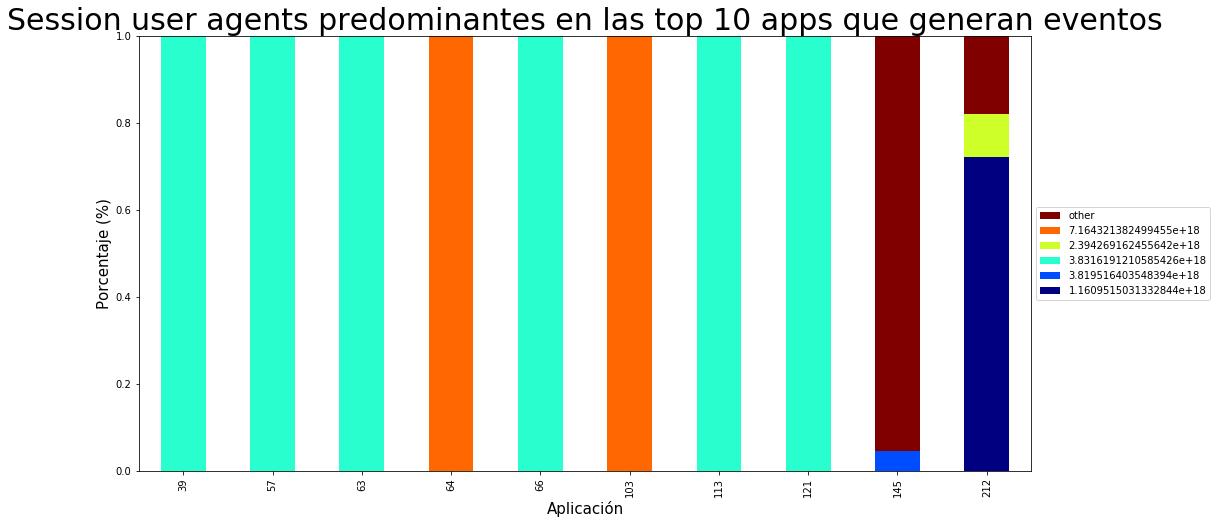

In [77]:
us = pd.DataFrame(top10apps.groupby(['application_id', 'session_user_agent']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'session_user_agent', index = 'application_id')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['1.1609515031332844e+18', '3.819516403548394e+18', '3.8316191210585426e+18', '2.394269162455642e+18', '7.164321382499455e+18', 'other']
f = plt.figure()
plt.title('Session user agents predominantes en las top 10 apps que generan eventos',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Aplicación', size = 15);
ax.set_ylim(0,1)
plt.show()

Ahora terminé de transformar en categorías los valores más repetidos, con esto liberé un poco de memoria para trabajar más rápido.

# Empiezo a hacer preguntas

## Qué eventos son más comunes?

In [151]:
events.dtypes

date                  datetime64[ns]
event_id                       int64
ref_type                    category
application_id                uint16
attributed                      bool
device_os_version           category
device_brand                category
device_model                category
device_city                 category
session_user_agent          category
user_agent                  category
carrier                     category
kind                         float32
device_os                   category
wifi                        category
connection_type             category
ip_address                     int64
device_language               object
dtype: object

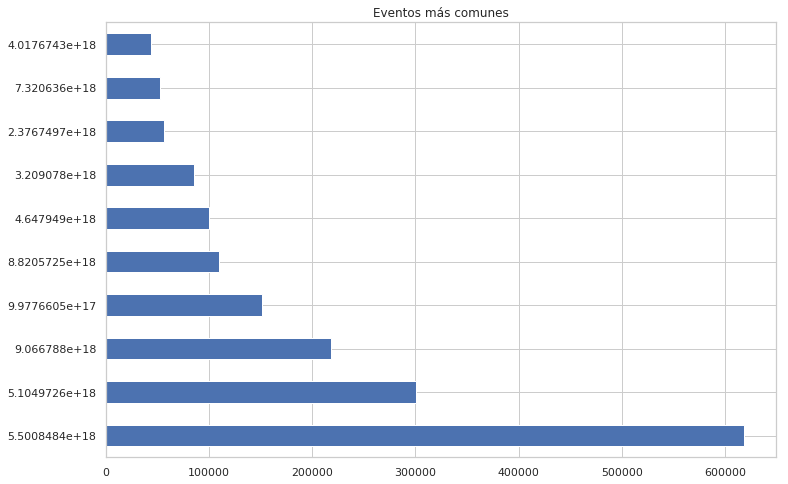

In [165]:
code = events['kind'].value_counts().nlargest(10).index
top10events = events[events['kind'].isin(code)]
top10events['kind'].value_counts().nlargest(10).plot(kind = 'barh', figsize = (12, 8), title = 'Eventos más comunes')
plt.show()

In [164]:
top10events[['kind', 'application_id']].groupby('kind').agg({'application_id' : 'value_counts'})

66     322334
64     254198
145    249345
103    135295
63     134666
57     112246
212    107776
121     69699
10      58311
120     36258
166     27476
113     24433
170     24315
102     20660
16      10931
7        9688
9        8162
39       8153
119      7678
265      7242
128      6398
136      6211
248      5881
112      5823
15       5797
8        5745
198      5162
140      4056
134      3924
77       3588
        ...  
101         4
178         4
316         4
30          3
239         3
127         3
290         2
264         2
257         2
11          2
234         2
228         2
117         2
303         1
305         1
295         1
146         1
232         1
294         1
33          1
272         1
261         1
255         1
245         1
240         1
81          1
165         1
132         1
154         1
322         1
Name: application_id, Length: 199, dtype: int64

## Hay una relación entre los eventos y el día de la semana?

In [92]:
events['date'] = pd.to_datetime(events['date'])

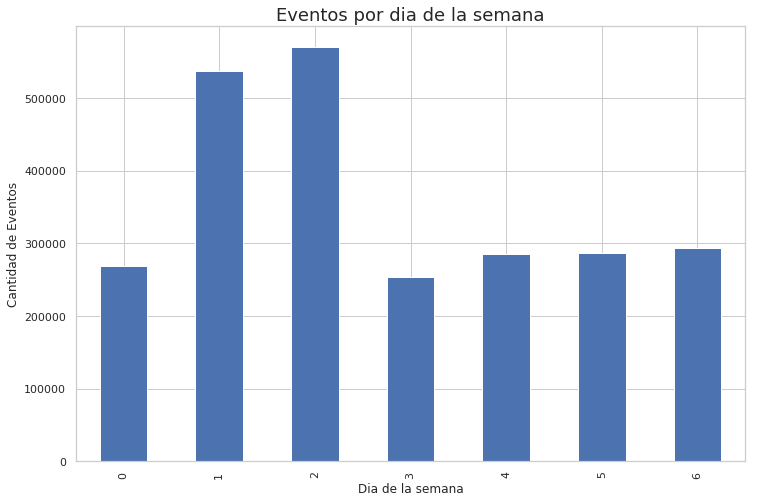

In [167]:
events['date'].dt.dayofweek.value_counts().sort_index().plot(kind = 'bar', figsize = (12,8))
plt.title("Eventos por dia de la semana", fontsize=18)
plt.xlabel("Dia de la semana", fontsize=12)
plt.ylabel("Cantidad de Eventos", fontsize=12)
plt.show()

## Hay una relación entre los eventos y el mes en que estamos?

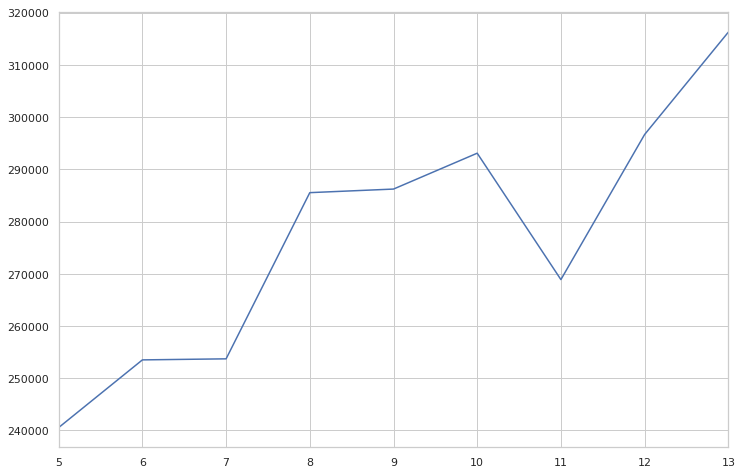

In [171]:
events['date'].dt.day.value_counts().sort_index().plot(figsize = (12,8))
plt.show()

## Hay una relación entre los eventos y el dispositivo que se usa?

In [97]:
events['hour'] = events['date'].dt.hour
events['hour']

0           0
1           0
2           0
3           0
4          21
5          20
6          20
7          20
8          20
9          20
10         20
11         20
12         20
13         20
14         20
15         20
16         20
17         20
18         20
19         20
20         20
21         20
22         20
23         20
24         20
25         20
26         20
27         20
28         20
29         20
           ..
2494393    14
2494394     2
2494395    22
2494396    22
2494397    22
2494398    22
2494399    15
2494400     0
2494401     0
2494402     0
2494403     2
2494404     2
2494405    23
2494406    23
2494407    23
2494408    18
2494409    18
2494410    18
2494411     0
2494412    15
2494413    15
2494414    21
2494415    21
2494416    16
2494417    16
2494418    10
2494419    22
2494420    22
2494421    14
2494422    18
Name: hour, Length: 2494423, dtype: int64

## En qué días y horarios se da la mayor cantidad de eventos?

Text(39.5, 0.5, 'Hora')

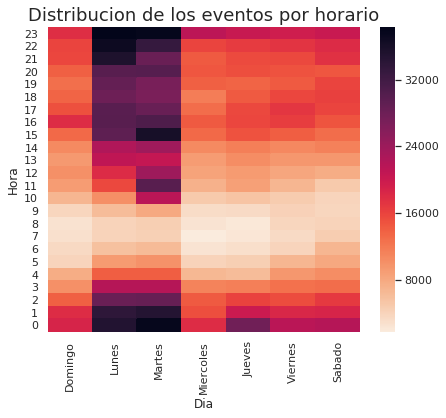

In [98]:
eventos_dia_hora = events.groupby(["dayofweek","hour"])["event_id",].count()
pivot_post = eventos_dia_hora.pivot_table(index="hour", columns="dayofweek", values= "event_id")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r
g = sns.heatmap(pivot_post, xticklabels=['Domingo','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado'], cmap=cmap)
g.set_title("Distribucion de los eventos por horario", fontsize=18)
g.set_xlabel("Dia", fontsize=12)
g.set_ylabel("Hora", fontsize=12)

Text(39.5, 0.5, 'Hora')

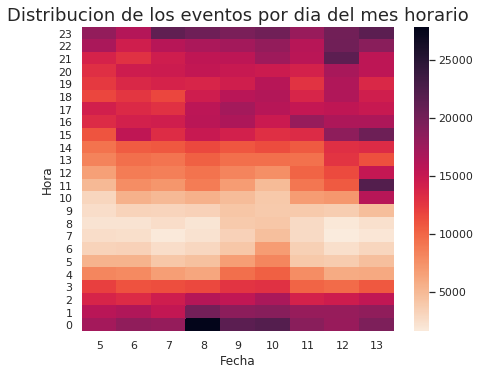

In [99]:
events["day"] = events["date"].dt.day
eventos_dia_del_mes_hora = events.groupby(["day","hour"])["event_id",].count()
pivot_post = eventos_dia_del_mes_hora.pivot_table(index="hour", columns="day", values= "event_id")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r
g = sns.heatmap(pivot_post, cmap=cmap)
g.set_title("Distribucion de los eventos por dia del mes horario", fontsize=18)
g.set_xlabel("Fecha", fontsize=12)
g.set_ylabel("Hora", fontsize=12)

## Hay una relación entre algún tipo de evento y la ciudad?

In [100]:
eventos_por_tipo_ciudad = events.groupby(["device_city", "kind"])['event_id',].count()
eventos_por_tipo_ciudad

event_id
device_city            kind                            
1.0840811693621105e+18 1.0892133843023939e+18       NaN
                       1.6563223891614241e+18       NaN
                       2.1075935208469972e+18       NaN
                       2.404150911237027e+18        NaN
                       2.4645942301908767e+18       NaN
                       2.4772724646814203e+18       NaN
                       2.564145725267859e+18        NaN
                       3.2040948978572534e+18       NaN
                       3.384507282270512e+17        NaN
                       3.4799321853891236e+18       NaN
                       3.511769859555669e+18        NaN
                       3.6165537239121797e+18       NaN
                       3.6498748815498537e+18       NaN
                       3.7449261418550707e+18       NaN
                       3.8181136862523633e+18       NaN
                       3.8848596540592865e+18       NaN
                       3.950512715088653e+18        NaN
                       3.9595250720179963e+18       NaN
                       3.991959134911789e+18        NaN
                       4.17265515780122e+18         NaN
                       4.510630249067179e+18        NaN
                       4.5833388099797786e+18       NaN
                       4.956614591795591e+18        NaN
                       5.148713255096809e+18        NaN
                       5.37646449870323e+17         NaN
                       5.455064549483251e+18        NaN
                       5.500848327478996e+18        NaN
                       5.516623012570946e+18        NaN
                       5.775530062890707e+18        NaN
                       5.800153412043482e+18        NaN
...                                                 ...
2.887475017904211e+18  6.529595168169902e+18        NaN
                       7.310429127362015e+17        NaN
                       8.189929103863038e+18        NaN
                       8.210459666847846e+18        NaN
                       1.0030107346383939e+18       NaN
                       1.0772805117502975e+18       NaN
                       3.355424689298487e+18        NaN
                       4.309396518425585e+18        NaN
                       6.097112130180949e+18        NaN
                       7.361843095678323e+18        NaN
                       8.765326698185905e+18        NaN
                       7.989347374959774e+18        NaN
                       8.833804438801752e+18        NaN
                       1.7060082899499889e+18       NaN
                       6.058383514806756e+18        NaN
                       8.615504956175203e+18        NaN
                       2.1363607996738337e+18       NaN
                       3.9568678667173366e+18       NaN
                       4.631541600481005e+18        NaN
                       7.312174893241169e+18        NaN
                       7.73658639556426e+17         NaN
                       2.1514367295560906e+18       NaN
                       3.1887425909788913e+18       NaN
                       5.24073989882085e+18         NaN
                       6.195433350651948e+18        NaN
                       6.649155874988479e+18        NaN
                       1.4497712628732416e+18       NaN
                       3.3520700030203315e+18       NaN
                       6.818241515712069e+18        NaN
                       7.251762312137193e+18        NaN

[74041 rows x 1 columns]

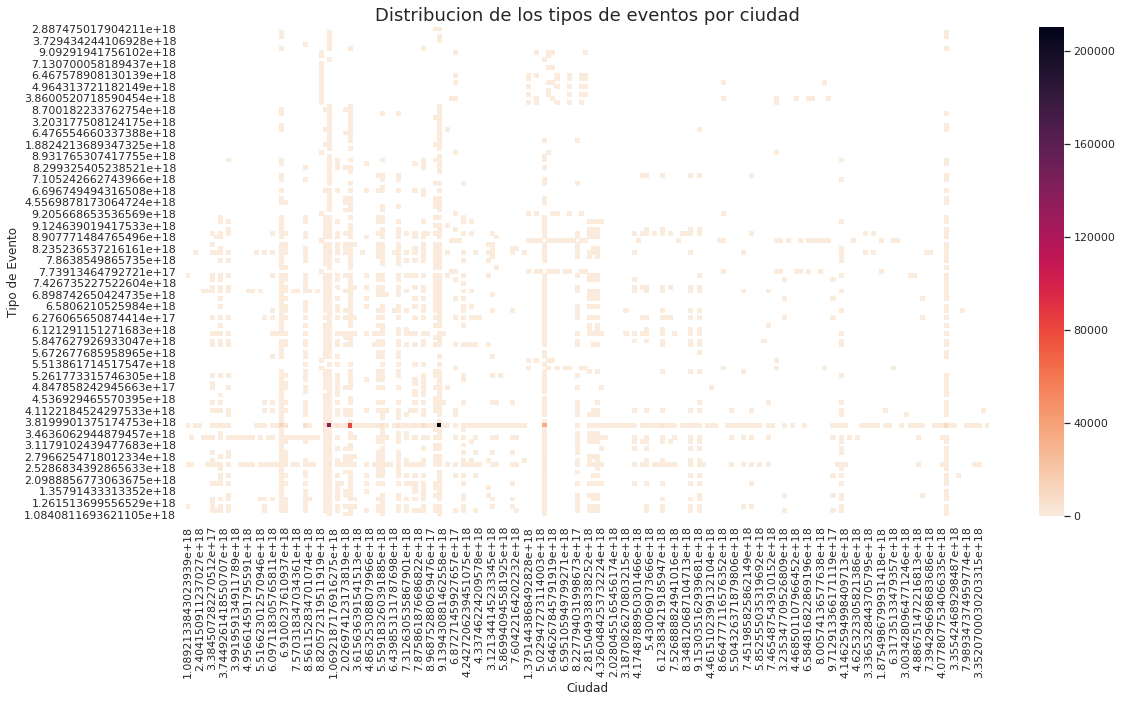

In [169]:
pivot_post = eventos_por_tipo_ciudad.pivot_table(index="device_city", columns="kind", values="event_id")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(18,9))
cmap = sns.cm.rocket_r
g = sns.heatmap(pivot_post, cmap=cmap)
g.set_title("Distribucion de los tipos de eventos por ciudad", fontsize=18)
g.set_xlabel("Ciudad", fontsize=12)
g.set_ylabel("Tipo de Evento", fontsize=12)
plt.show()

## Qué dispositivo se usa en cada la ciudad?

In [102]:
dipositivo_por_ciudad = events.groupby(["device_city", "device_brand"])['event_id',].count()
dipositivo_por_ciudad

event_id
device_city            device_brand                    
1.0840811693621105e+18 1.083368711068078e+18        NaN
                       2.208834667126999e+18        NaN
                       3.083058605577787e+17        NaN
                       3.812620986737351e+18        NaN
                       5.1379920467642125e+17       NaN
                       5.185901324752864e+18        NaN
                       5.588755459133625e+18        NaN
                       5.785735136024376e+17        NaN
                       7.97262313950176e+18         NaN
                       1.280056370771215e+18        NaN
                       1.619581446714784e+18        NaN
                       1.6679603354061018e+18       NaN
                       1.8829174247592527e+18       NaN
                       2.262848417324907e+18        NaN
                       2.370132235094487e+18        NaN
                       2.5232459822329236e+18       NaN
                       2.776400652041713e+18        NaN
                       2.987569314309514e+18        NaN
                       3.093165991971729e+18        NaN
                       3.2285160909036396e+18       NaN
                       3.742387098176767e+18        NaN
                       4.1137519177429806e+18       NaN
                       4.371307750970993e+18        NaN
                       4.994101372019545e+18        NaN
                       5.645691558423168e+18        NaN
                       5.937501462472654e+18        NaN
                       6.111646853627296e+18        NaN
                       6.538561794435555e+18        NaN
                       6.751007869822716e+18        NaN
                       6.820360148347398e+18        NaN
...                                                 ...
2.887475017904211e+18  4.2322932292689935e+18       NaN
                       4.268211727430926e+18        NaN
                       6.521400989943291e+18        NaN
                       7.597382259149133e+18        NaN
                       2.1695037301560579e+18       NaN
                       4.672409028324332e+17        NaN
                       5.78431634405713e+18         NaN
                       3.2815484456076293e+18       NaN
                       3.624089450035605e+18        NaN
                       4.1890225218996413e+18       NaN
                       8.081274400524402e+18        NaN
                       3.265491610599788e+18        NaN
                       2.606960612845661e+18        NaN
                       2.7422482188038554e+18       NaN
                       9.032030997022273e+18        NaN
                       6.709370344976139e+18        NaN
                       4.5700574344819133e+18       NaN
                       2.4434325627689795e+18       NaN
                       2.8059788291423923e+18       NaN
                       7.071537552116215e+18        NaN
                       3.833810677186203e+17        NaN
                       7.420430704605125e+18        NaN
                       6.127621457088335e+18        NaN
                       3.3705219610064794e+18       NaN
                       7.013711285598757e+18        NaN
                       8.412517547311859e+18        NaN
                       1.3776256670286917e+18       NaN
                       4.580007230075633e+18        NaN
                       3.4242797791182403e+18       NaN
                       8.645767265847268e+18        NaN

[31750 rows x 1 columns]